In [42]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
#Scipy Library
from scipy import stats
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
from sklearn.preprocessing import OneHotEncoder

In [43]:
patient_stay = pd.read_csv("train.csv")
train = patient_stay
train

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [44]:
# Python Method 1 : Displays Data Information :

def display_data_information(data , data_types ,dataframe_name):
    print("Information of ",dataframe_name," : Rows = ",data.shape[0] , " | Columns = ",data.shape[1],"\n")
    data.info()
    print("\n")
    for VARIABLE in data_types :
        data_type = data.select_dtypes(include = [VARIABLE]).dtypes
        if len(data_type) > 0 :
            print(str(len(data_type)) + " " + VARIABLE + " Features\n" + str(data_type)+"\n")

In [45]:
# Display Data Information of "patient_profile" :

data_types  = ["float32","float64","int32","int64","object","category","datetime64[ns]"]
display_data_information(patient_stay, data_types, "patient_length_of_stay")

Information of  patient_length_of_stay  : Rows =  318438  | Columns =  18 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                   

In [46]:
# Python Method 2 : Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table) :

def display_head_tail(data, head_rows, tail_rows):
    display("Data Head & Tail :")
    display(data.head(head_rows).append(data.tail(tail_rows)))
#     return True

# Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table)
# Pass Dataframe as "patient_stay", No. of Rows in Head = 3 and No. of Rows in Tail = 2 :

display_head_tail(patient_stay, head_rows=3, tail_rows=2)

'Data Head & Tail :'

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20
318437,318438,19,a,7,Y,5,gynecology,Q,C,2.0,21641,8.0,Emergency,Minor,2,11-20,4752.0,0-10


In [47]:
# Python Method 3 : Displays Data Description using Statistics :
def display_data_description(data , numeric_data_types = None , categorical_data_types = None):
    print("Data Description :")
    display(data.describe(include = numeric_data_types))
    print("")
    display(data.describe(include = categorical_data_types))

# Displays Train Data Description
display_data_description(patient_stay , data_types[0:4] , data_types[4:7])

Data Description :


,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Age,Stay
count,318438,318438,318438,318438,318438,318438,318438,318438,318438
unique,7,3,5,6,6,3,3,10,11
top,a,X,gynecology,R,F,Trauma,Moderate,41-50,21-30
freq,143425,133336,249486,127947,112753,152261,175843,63749,87491


In [48]:
#Python Method 4 : Remove Data Duplicates while Retaining the First one - Similar to SQL DISTINCT :

def remove_duplicate(data):
    
    print("BEFORE REMOVING DUPLICATES - No. of Rows = ",data.shape[0])
    data.drop_duplicates(keep = "first" , inplace =True)
    print("AFTER REMOVING DUPLICATES  - No. of Rows = ",data.shape[0]) 
    return data

In [49]:
# Remove Duplicates from "train" data
train = remove_duplicate(train)

BEFORE REMOVING DUPLICATES - No. of Rows =  318438
AFTER REMOVING DUPLICATES  - No. of Rows =  318438


In [50]:
# Python Method 5 : Fills or Imputes Missing values with Various Methods : 

def fill_missing_values(data, fill_value, fill_types, columns, dataframe_name):
    
    print("Missing Values BEFORE REMOVAL in ",dataframe_name," data")
    display(data.isnull().sum())
    for column in columns :
        
        # Fill Missing Values with Specific Value :
        if "Value_Fill" in fill_types :
            data[column].fillna(fill_value , inplace = True)
           #print("Value_Fill")

        # Fill Missing Values with Forward Fill  (Previous Row Value as Current Row in Table) :
        if "Forward_Fill" in fill_types :
            data[ column ] = data[ column ].ffill(axis = 0)
#             print("Forward_Fill")

        # Fill Missing Values with Backward Fill (Next Row Value as Current Row in Table) :
        if "Backward_Fill" in fill_types :
            data[ column ] = data[ column ].bfill(axis = 0)
#             print("Backward_Fill")
    
    print("Missing Values AFTER REMOVAL in ",dataframe_name," data")
    display(data.isnull().sum())
    
    return data

In [51]:
#Filling the missing values in City Code Patient

fill_value = stats.mode(train["City_Code_Patient"] , axis =None)
fill_value = int(np.squeeze(fill_value[0])  )
print(fill_value)
fill_types = [ "Value_Fill"]
#fill_missing_values(train , fill_value ,fill_types, "City_Code_Patient" , "train")

train["City_Code_Patient"].fillna(fill_value , inplace = True)
train.isnull().sum()

8


case_id                                0
Hospital_code                          0
Hospital_type_code                     0
City_Code_Hospital                     0
Hospital_region_code                   0
Available Extra Rooms in Hospital      0
Department                             0
Ward_Type                              0
Ward_Facility_Code                     0
Bed Grade                            113
patientid                              0
City_Code_Patient                      0
Type of Admission                      0
Severity of Illness                    0
Visitors with Patient                  0
Age                                    0
Admission_Deposit                      0
Stay                                   0
dtype: int64

In [52]:
train['Bed Grade'].unique()
null_indices_of_bedgrade = train[train['Bed Grade'].isnull()].index.tolist()

In [53]:
#getting uniques value of hospital code w.r.to null values of bed grade to list
list1 = train.iloc[null_indices_of_bedgrade]['Hospital_code'].unique()
list1 = list(list1)
for i in list1:
    m = train['Hospital_code'] == i
    mode_value = int(stats.mode(train.loc[m , 'Bed Grade'])[0])  
    train.loc[m , 'Bed Grade'] = train.loc[m , 'Bed Grade'].fillna(mode_value)

In [54]:
# Python Method 6 : Displays Unique Values in Each Column of the Dataframe(Table) :

def display_unique(data):
    for column in data.columns :
        
        print("No of Unique Values in "+column+" Column are : "+str(data[column].nunique()))
        print("Actual Unique Values in "+column+" Column are : "+str(data[column].sort_values(ascending=True,na_position='last').unique() ))
        print("NULL Values :")
        print(data[ column ].isnull().sum())
        print("Value Counts :")
        print(data[column].value_counts())
        print("")

In [55]:
display_unique(train)

No of Unique Values in case_id Column are : 318438
Actual Unique Values in case_id Column are : [     1      2      3 ... 318436 318437 318438]
NULL Values :
0
Value Counts :
2047      1
107105    1
31322     1
29275     1
19036     1
         ..
21920     1
23969     1
17826     1
19875     1
2049      1
Name: case_id, Length: 318438, dtype: int64

No of Unique Values in Hospital_code Column are : 32
Actual Unique Values in Hospital_code Column are : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32]
NULL Values :
0
Value Counts :
26    33076
23    26566
19    21219
6     20425
11    17328
14    17328
28    17137
27    14244
9     11510
29    11311
12    11297
32    10703
25     9834
10     9435
15     9257
21     8150
24     7992
3      7116
17     5501
5      5261
1      5249
13     5236
2      5102
30     5002
22     4277
31     3967
16     3671
8      3663
18     3630
20     1405
7      1306
4      1240
Name: Hospital_code, dtype: in

how we will do label encoding to target column which is stay 

In [57]:
train["Stay"].unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [58]:
stay_ordinal={"0-10":0,
              '11-20':1,
              '21-30':2, 
              '31-40':3, 
              '41-50':4,
              '51-60':5,
              '61-70':6,
              '71-80':7,
              '81-90':8,
              '91-100':9,
    'More than 100 Days':10
}
train["Stay_coded"]=train.Stay.map(stay_ordinal)

In [59]:
train=train.drop(["case_id","Stay"],axis=1)
train

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay_coded
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,4
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,3
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,4
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,1
318434,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,3
318435,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,1
318436,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,1


In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318438 entries, 0 to 318437
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int64  
 1   Hospital_type_code                 318438 non-null  object 
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Hospital_region_code               318438 non-null  object 
 4   Available Extra Rooms in Hospital  318438 non-null  int64  
 5   Department                         318438 non-null  object 
 6   Ward_Type                          318438 non-null  object 
 7   Ward_Facility_Code                 318438 non-null  object 
 8   Bed Grade                          318438 non-null  float64
 9   patientid                          318438 non-null  int64  
 10  City_Code_Patient                  318438 non-null  float64
 11  Type of Admission                  3184

In [61]:
category_train=train.columns[train.dtypes==object].tolist()
category_train

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age']

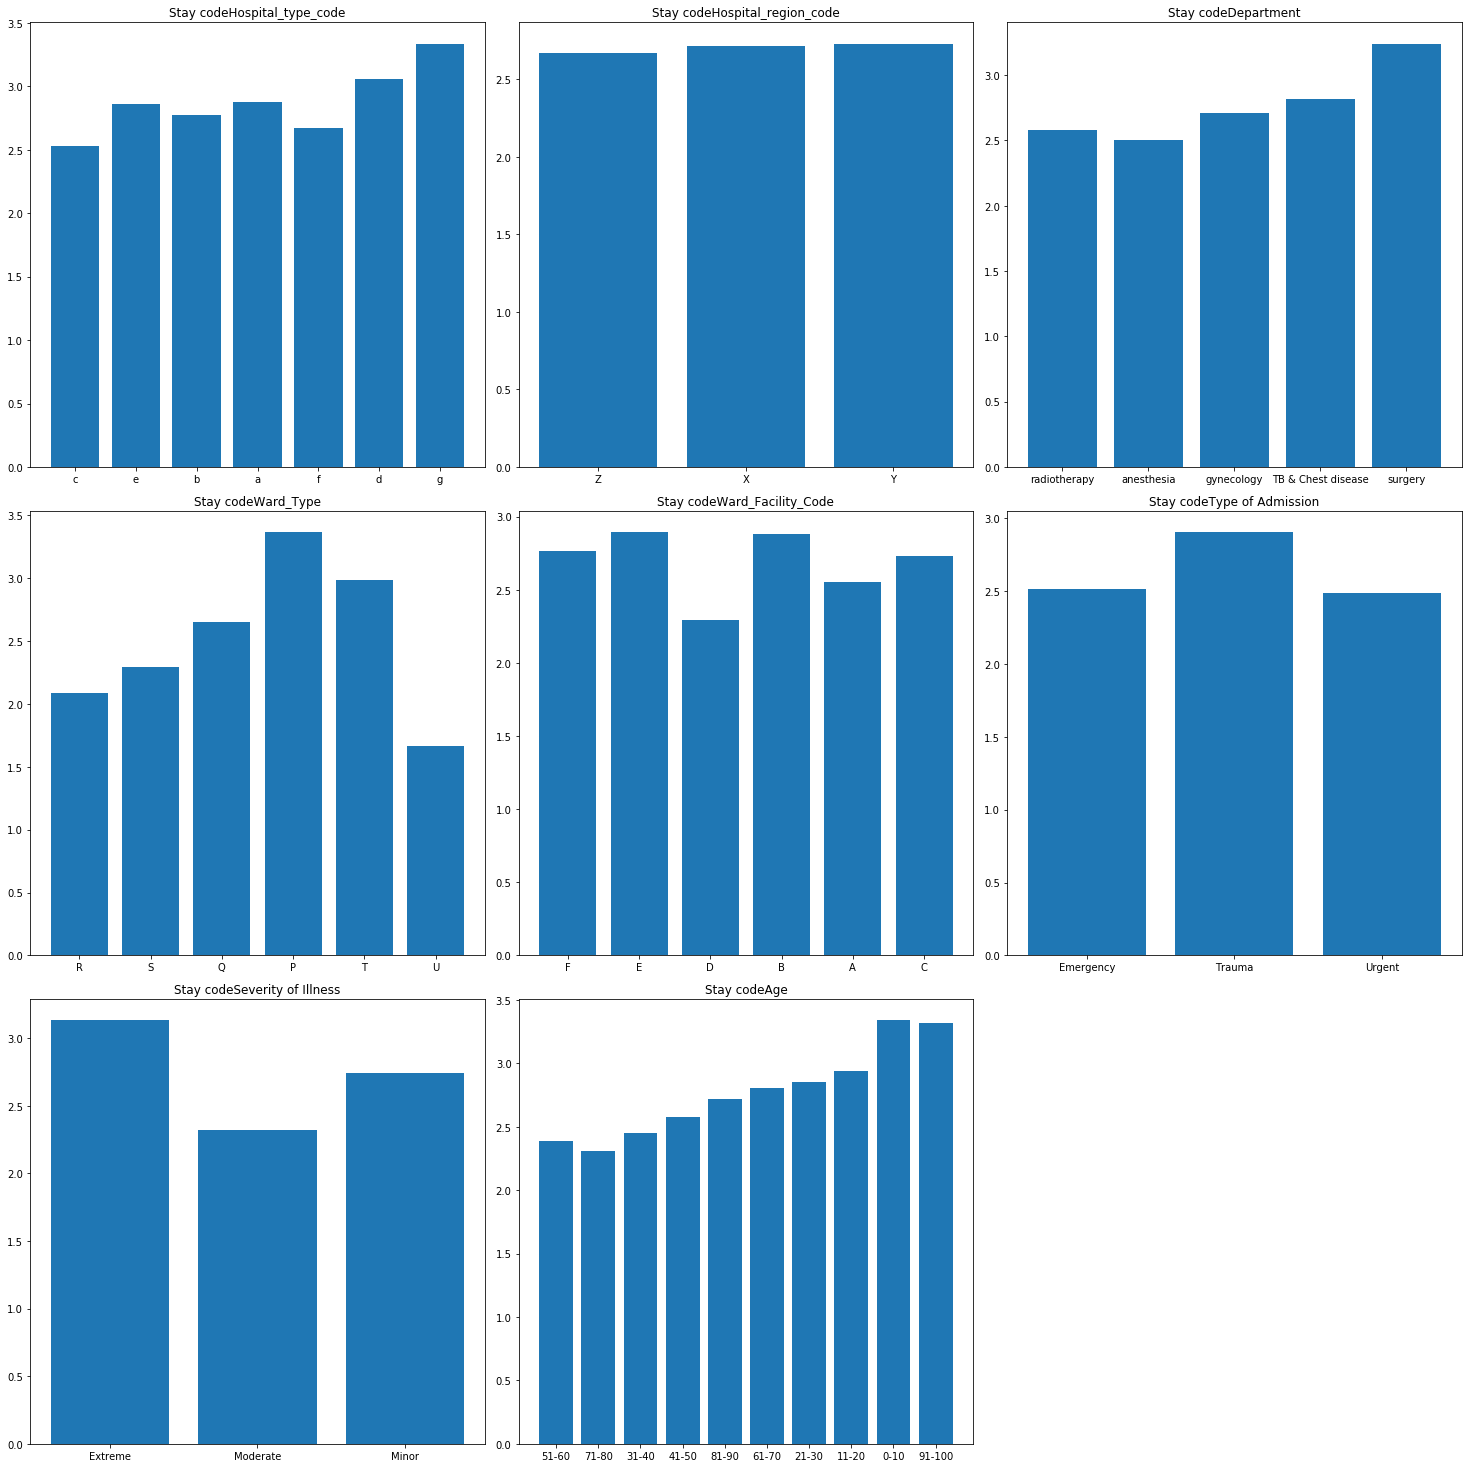

In [62]:
cg_features = list(train[category_train].columns)
sp=1
for columns in cg_features:
    plt.subplot(3,3,sp)
    plt.title('Stay code' + columns)
    cat_list = train[columns].unique()
    cat_average = train.groupby(columns).mean()['Stay_coded']
    plt.bar(cat_list,cat_average)    
    sp+=1
fig = plt.gcf()
fig.set_size_inches(20.5, 20.5)
plt.tight_layout()

from above we can say  Hospital_region_code will is almost same so we will drop it 

now we will see the same visualzaton with interger value

In [63]:
int_train=train.columns[train.dtypes== int].tolist()
int_train
float_train=train.columns[train.dtypes== float].tolist()
float_train
numerical_train=int_train+float_train
numerical_train

['Hospital_code',
 'City_Code_Hospital',
 'Available Extra Rooms in Hospital',
 'patientid',
 'Visitors with Patient',
 'Stay_coded',
 'Bed Grade',
 'City_Code_Patient',
 'Admission_Deposit']

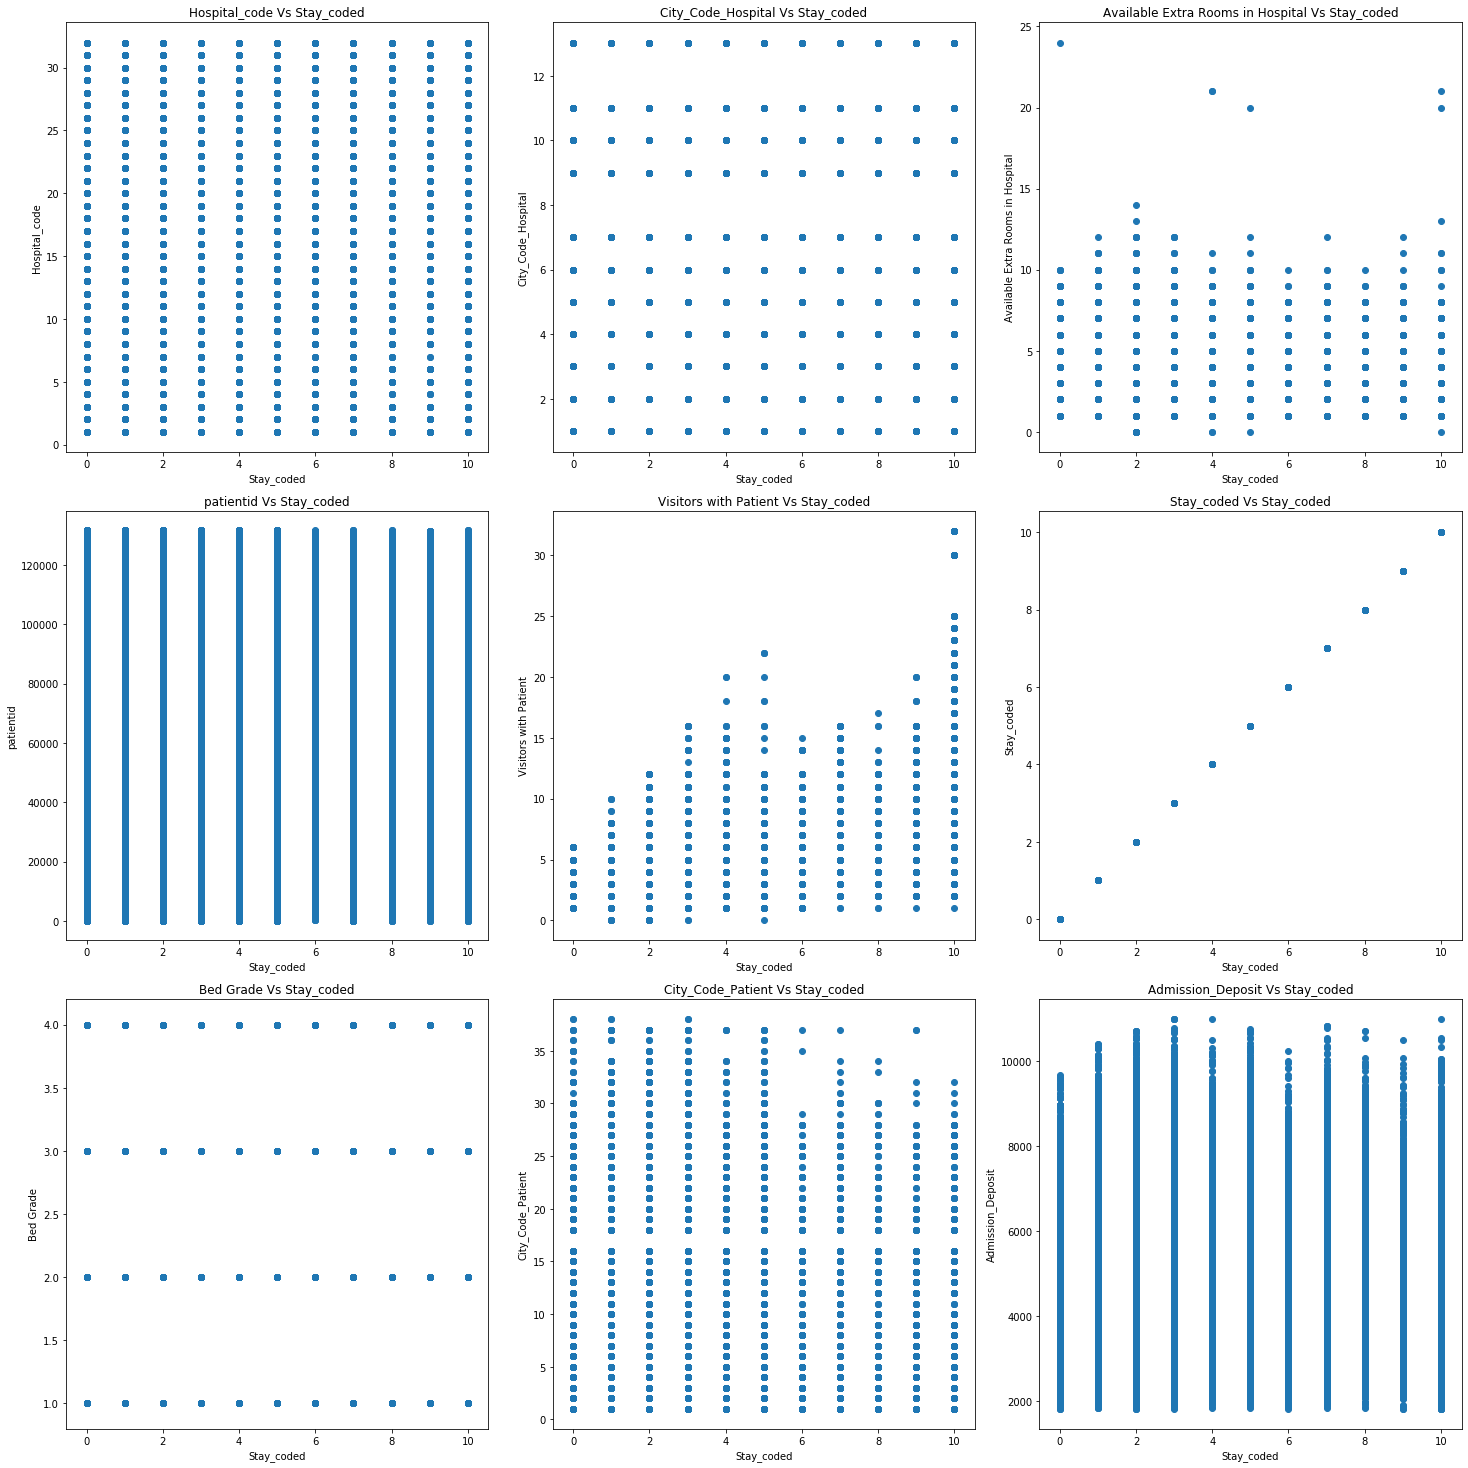

In [64]:
c_features = list(train[numerical_train].columns)
sp = 1
for columns in c_features:
    plt.subplot(3,3,sp)
    plt.title(columns + ' Vs Stay_coded')
    plt.xlabel('Stay_coded')
    plt.ylabel(columns)
    plt.scatter( train['Stay_coded'],train[columns])    
    sp+=1
fig = plt.gcf()
fig.set_size_inches(20.5, 20.5)
plt.tight_layout()

From above figure we will drop patientid and hospital code

In [65]:
#now dropping columns
train=train.drop(["patientid","Hospital_code","Hospital_region_code"],axis=1)


In [83]:
train

,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay_coded
0,c,3,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,2,51-60,4911,0
1,c,5,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,2,51-60,5954,4
2,e,1,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,2,51-60,4745,3
3,b,2,2,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,2,51-60,7272,4
4,b,2,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,2,51-60,5558,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,a,6,3,radiotherapy,Q,F,4.0,23.0,Emergency,Moderate,3,41-50,4144,1
318434,a,1,2,anesthesia,Q,E,4.0,8.0,Urgent,Moderate,4,81-90,6699,3
318435,a,4,3,gynecology,R,F,4.0,10.0,Emergency,Minor,3,71-80,4235,1
318436,b,2,3,anesthesia,Q,D,3.0,8.0,Trauma,Minor,5,11-20,3761,1


In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318438 entries, 0 to 318437
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_type_code                 318438 non-null  object 
 1   City_Code_Hospital                 318438 non-null  int64  
 2   Available Extra Rooms in Hospital  318438 non-null  int64  
 3   Department                         318438 non-null  object 
 4   Ward_Type                          318438 non-null  object 
 5   Ward_Facility_Code                 318438 non-null  object 
 6   Bed Grade                          318438 non-null  float64
 7   City_Code_Patient                  318438 non-null  float64
 8   Type of Admission                  318438 non-null  object 
 9   Severity of Illness                318438 non-null  object 
 10  Visitors with Patient              318438 non-null  int64  
 11  Age                                3184

In [80]:
train["Admission_Deposit"]=train["Admission_Deposit"].astype(int)

In [82]:
test=pd.read_csv("cleaned_test.csv")
test

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0
137053,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0
137054,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0
137055,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0


In [68]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [69]:
category_train=train.columns[train.dtypes==object].tolist()
category_test=test.columns[test.dtypes==object].tolist()
total_category=category_train+category_test
columns=pd.unique(total_category).tolist()

In [70]:
final_df=category_onehot_multcols(columns)

Hospital_type_code


KeyError: 'Hospital_type_code'

In [ ]:
final_df=final_df.loc[:,~final_df.columns.duplicated()]
final_df.shape

In [ ]:
final_df